In [1]:
# import libraries
import pandas as pd
import seaborn as sns

In [2]:
# Load dataset
penguins = sns.load_dataset("penguins")

# Examine first 5 rows of the dataset
penguins.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
penguins['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [4]:
# Keep Adelie and Gentoo penguins, drops NAs
penguins_sub = penguins[penguins["species"] != "Chinstrap"]
penguins_final = penguins_sub.dropna()
penguins_final.reset_index(inplace=True, drop=True)

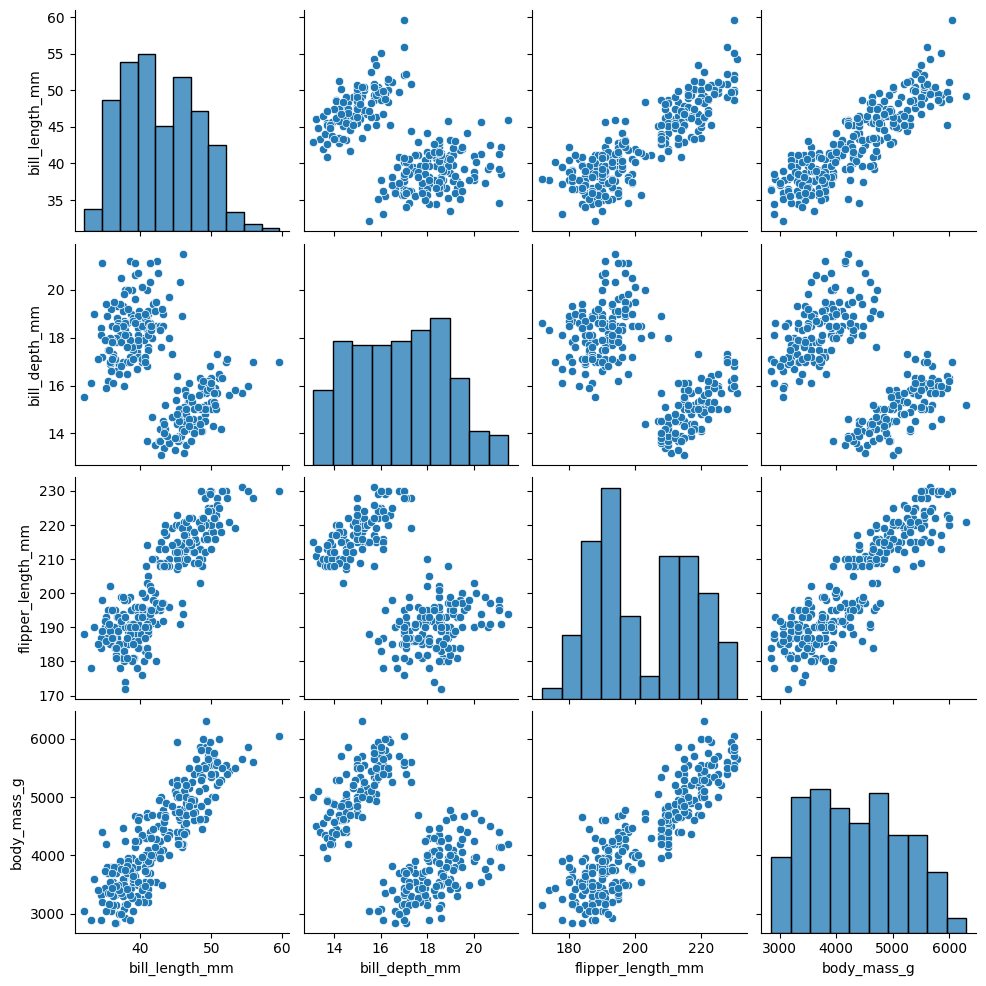

In [5]:
sns.pairplot(penguins_final)

**Scatterplot matrix :** A series of scatterplots that shows the relationships between pairs of variables.

**Observations :**

- Using the pairplots we can observe some linear relationships in the scatterplot matrix. The diagonal displays the distribution of the continous variables. This assures you that the data has met the linearity assumption for building simple linear regression.

![](./output/1_scatterplot_matrix.png)

- First `bill_length_mm` and `body_mass_g` seems to be positively correlated. Next `flipper_length_mm` and `bill_length_mm` are also seems to be positively correlated. Lastly, `body_mass_g` and `flipper_length_mm` also seem to be correlated.

![](./output/2_scatterplot_matrix_2.png)

### Linear regression assumptions 

1. Linearity : We met the first linear regression assumption, yes that's linearity.

![](./output/3_linearity_assumption.png)

2. Normality : We can also observe that both `bill_length_mm` and `body_mass_g` are close to be normality distributed. This suggests that will probably have normally distributed residuals.

![](./output/4_Normality_assumption.png)


3. independent Observations : Since each row has data on a different penguin, we have no reason to believe that one penguins billing or body mass is related to other penguins.

4. Homoscedasicity : After we build our model we graph the residuals.

In [6]:
# Subset Data
ols_data = penguins_final[["bill_length_mm", "body_mass_g"]]

In [7]:
# Write out formula
ols_formula = "body_mass_g ~ bill_length_mm"

In [8]:
# Import ols function
from statsmodels.formula.api import ols

In [9]:
# Build OLS, fit model to data
OLS = ols(formula= ols_formula, data = ols_data)
model = OLS.fit()

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     874.3
Date:                Sat, 23 Mar 2024   Prob (F-statistic):           1.33e-85
Time:                        00:44:24   Log-Likelihood:                -1965.8
No. Observations:                 265   AIC:                             3936.
Df Residuals:                     263   BIC:                             3943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1707.2919    205.640     -8.302      0.000   -2112.202   -1302.382
bill_length_mm   141.1904      4.775     29.569      0.000     131.788     150.592
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                2.103
Skew:                           0.210   Prob(JB):                        0.349
Kurtosis:                       2.882   Cond. No.                         357.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

![](./output/5_intercept_and_slope.png)

y = intercept + slope * x

![](./output/6_line_equation.png)

body_mass_g = -1707.30 + 141.19 * bill_length_mm

In [11]:
# Subset X variable
X = ols_data['bill_length_mm']

# get predictions from model
fitted_values = model.predict(X)

In [12]:
# Calculate residuals
residuals = model.resid

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

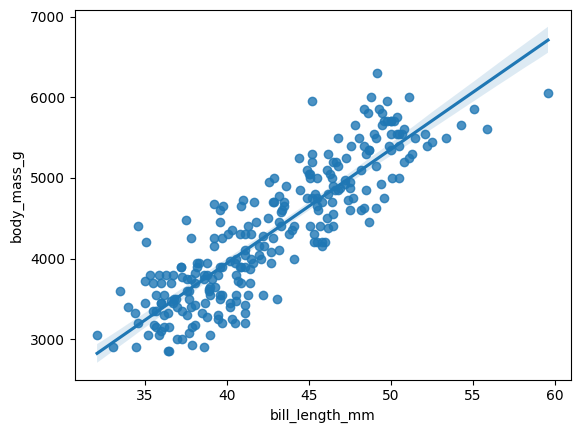

In [13]:
sns.regplot(x="bill_length_mm", y="body_mass_g", data=ols_data)

**Observations :** You can observe a linear relationship between the variables, the best fit line, and a small shaded region around the line indicating the uncertainty around the model estimates.

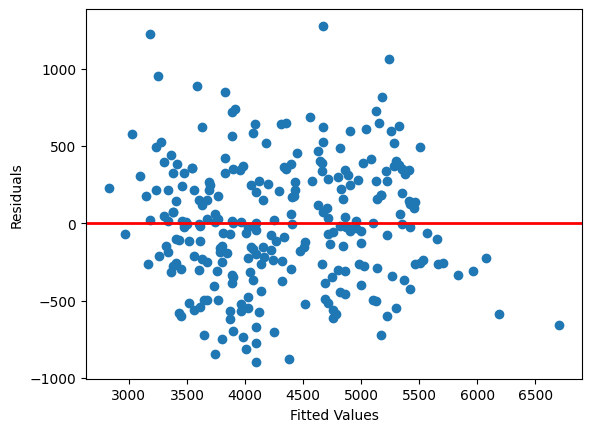

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(fitted_values, residuals)
ax.axhline(0, color='red', lw=2)
ax.set_xlabel("Fitted Values")
ax.set_ylabel("Residuals")
plt.show()

**Observations :** You can observe that residuals seem randomly space, which means you can assume **homoscedasticity**. A random looking scatter plot is indicative that the independence assumption is not violated.

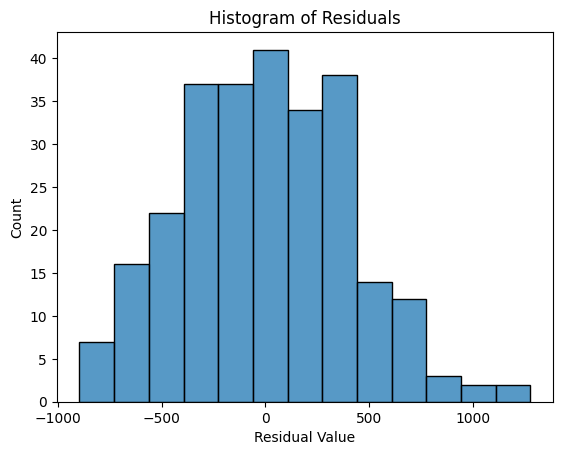

In [15]:
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

**Observations :** If the residuals are normally distributed following that classic bell curve shape, then you can confirm the normality assumption has been met as well. The residuals are a little bit skewed in the histogram.

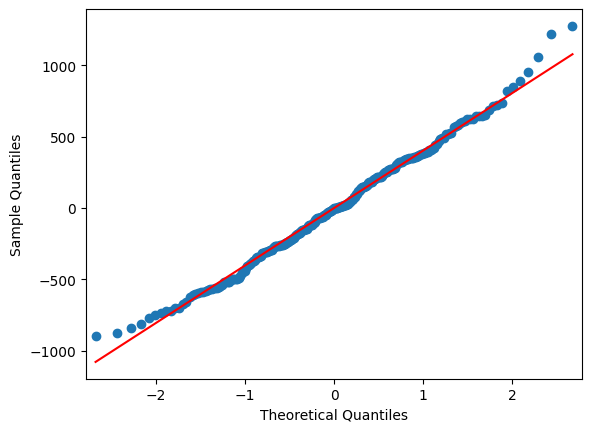

In [16]:
import statsmodels.api as sm
fig = sm.qqplot(model.resid, line='s')
plt.show()

**Observations :** to verify the normality assumption, let's create a QQ plot. Using the stats model QQ plot function to create the graph. There is a straight diagonal line trending upward with some slight curvature on the extremes. You may want to explore this further, but for now this is pretty good confirmation of the normality assumption. 